In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_excel("https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true", "products")

df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


1. Visualizzare il numero di prodotti di cui non si conosce l'anno del modello

In [3]:
df["model_year"].isnull().sum()

10

2. Eliminare i prodotti del punto precedente dal dataframe

In [18]:
df.dropna(inplace = True)
df

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016.0,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016.0,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016.0,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


3. Contare i prodotti che sono stati presenteti (model_year) nel 2017

In [5]:
df.loc[df["model_year"] == 2017.0, ["product_id"]].count()

product_id    85
dtype: int64

4. Visualizzare i prodotti che hanno un category_id compreso tra 2 e 4 (estemi inclusi)

In [6]:
df.loc[(df["category_id"] >= 2) & (df["category_id"] <= 4)]

,product_id,product_name,brand_id,category_id,model_year,list_price
9,10,Surly Straggler - 2016,8,4,2016.0,1549.00
10,11,Surly Straggler 650b - 2016,8,4,2016.0,1680.99
11,12,Electra Townie Original 21D - 2016,1,3,2016.0,549.99
12,13,Electra Cruiser 1 (24-Inch) - 2016,1,3,2016.0,269.99
13,14,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,1,3,2016.0,269.99
...,...,...,...,...,...,...
309,310,Electra Townie Commute 27D Ladies - 2018,1,2,2018.0,899.99
311,312,Electra Townie Commute 8D Ladies' - 2018,1,2,2018.0,699.99
312,313,Electra Townie Original 1 Ladies' - 2018,1,2,2018.0,449.99
313,314,Electra Townie Original 21D EQ Ladies' - 2018,1,2,2018.0,679.99


5. Visualizzare i prodotti che hanno la parola Trek nel nome

In [7]:
df.loc[df["product_name"].str.contains("Trek")]

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016.0,379.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016.0,2899.99
6,7,Trek Slash 8 27.5 - 2016,9,6,2016.0,3999.99
7,8,Trek Remedy 29 Carbon Frameset - 2016,9,6,2016.0,1799.99
28,29,Trek X-Caliber 8 - 2017,9,6,2017.0,999.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019.0,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019.0,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019.0,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019.0,3799.99


6. Visualizzare il numero di prodotti per ogni categoria (visualizzare il numero della categoria e il numero di prodotti)

In [8]:
df.groupby("category_id")["product_name"].count()

category_id
1    57
2    28
3    76
4    10
5    22
6    59
7    59
Name: product_name, dtype: int64

7. Visualizzare le categorie che hanno più di 50 prodotti visualizzare il numero della categoria e il numero di prodotti)

In [9]:
df1 = df.groupby("category_id", as_index = False)["product_name"].count()

df1.loc[df1["product_name"] > 50]

,category_id,product_name
0,1,57
2,3,76
5,6,59
6,7,59


8 Visualizzare uno stacked bar chart che riporti il numero di prodotti presentati per ogni anno in ogni categoria. Il grafico deve presentare sulle ascisse il numero della categoria e sulle ordinate il numero di prodotti, divisi per anno

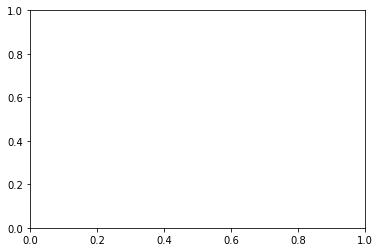

In [36]:
df2 = df.groupby(["model_year", "category_id"]).count()

fig = plt.figure()
ax = plt.axes()

9. Visualizzare un pie chart che riporti in numero di prodotti presentati in ogni anno.

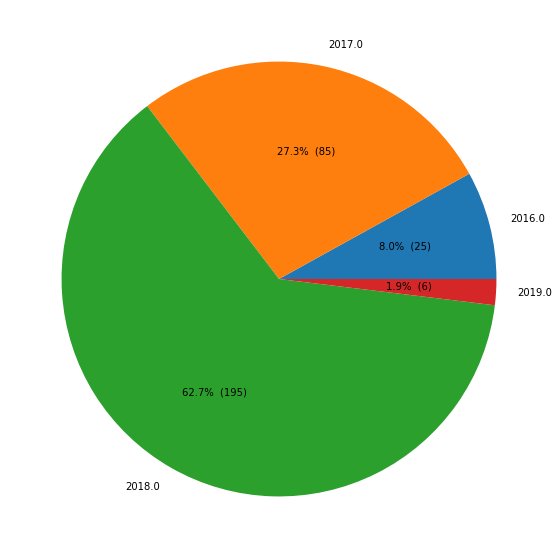

In [14]:
df3 = df.groupby("model_year")["product_name"].count()


fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.pie(df3.values,labels = df3.index, autopct=lambda x: '{:.1f}%  ({:,.0f})'.format(x,x * sum(df3.values)/100))

plt.show()

10. Salvare in un file png i due grafici affiancati